In [104]:
import pandas as pd
df = pd.read_csv('/content/airquality.csv')

In [105]:
df.head()

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,24-11-2017,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,NaN,NaN
1,AP001,25-11-2017,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
2,AP001,26-11-2017,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
3,AP001,27-11-2017,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
4,AP001,28-11-2017,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate


DATA CLEANING

In [144]:
df.isnull().sum()

,0
StationId,0
Date,0
PM2.5,11169
PM10,13818
NO,11313
NO2,6657
NOx,10213
NH3,25500
CO,5431
SO2,9838


In [107]:
df.shape

(108035, 16)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108035 entries, 0 to 108034
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   StationId   108035 non-null  object 
 1   Date        108035 non-null  object 
 2   PM2.5       86410 non-null   float64
 3   PM10        65329 non-null   float64
 4   NO          90929 non-null   float64
 5   NO2         91488 non-null   float64
 6   NOx         92535 non-null   float64
 7   NH3         59930 non-null   float64
 8   CO          95037 non-null   float64
 9   SO2         82831 non-null   float64
 10  O3          82467 non-null   float64
 11  Benzene     76580 non-null   float64
 12  Toluene     69333 non-null   float64
 13  Xylene      22898 non-null   float64
 14  AQI         87025 non-null   float64
 15  AQI_Bucket  87025 non-null   object 
dtypes: float64(13), object(3)
memory usage: 13.2+ MB


In [109]:
columns = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']

In [188]:
for col in columns:
  df[col] = df[col].fillna(df[col].mean())

In [189]:
df['AQI_Bucket'] = df['AQI_Bucket'].fillna(df['AQI_Bucket'].mode()[0])

In [147]:
df.isnull().sum()

,0
StationId,0
Date,0
PM2.5,0
PM10,0
NO,0
NO2,0
NOx,0
NH3,0
CO,0
SO2,0


In [113]:
df.duplicated().sum()

np.int64(0)

DATA INTEGRATION

In [114]:
column_new = df['StationId']
subset_2 = pd.DataFrame(column_new, columns = ['StationId'])

In [115]:
merged_subset = pd.concat([df[columns], subset_2], axis = 1)

In [116]:
merged_subset.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,StationId
0,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,179.74929,AP001
1,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.00000,AP001
2,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.00000,AP001
3,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.00000,AP001
4,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.00000,AP001


ERROR CORRECTING

<Axes: ylabel='AQI_Bucket'>

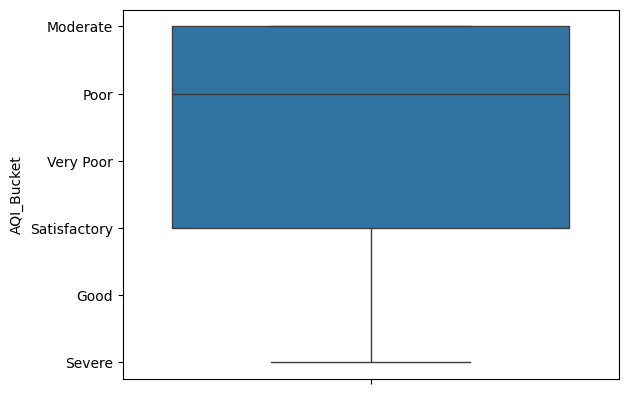

In [117]:
import seaborn as sns
sns.boxplot(df['AQI_Bucket'])

In [118]:
import numpy as np
def remove_outlier(column):
  q1 = column.quantile(0.25)
  q2 = column.quantile(0.75)
  IQR = q2-q1
  threshold = 1.5*IQR
  outliers = np.logical_or(column < (q1 - threshold), column > (q2 + threshold))
  return column[~outliers]

In [119]:
for col in columns:
  df[col] = remove_outlier(df[col])

In [120]:
df.shape

(108035, 16)

LABEL ENCODING

In [212]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# df['AQI_Bucket'] = le.fit_transform(df['AQI_Bucket'])

In [213]:
df.head()

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,24-11-2017,0.175813,-0.260022,-0.941263,-0.497533,-0.759757,-0.783597,-1.352981,1.417720e-01,-2.597868e-16,-0.776496,-0.197050,-0.594199,-1.140470e-16,6
1,AP001,25-11-2017,0.402635,-0.165669,-0.966815,-0.504592,-0.773280,-0.870138,-1.320987,8.364104e-01,-2.597868e-16,-0.762247,-0.140954,-0.627032,1.270271e-01,1
2,AP001,26-11-2017,0.333052,-0.116497,-0.981651,-0.245763,-0.656218,-0.896041,-1.288992,2.653634e+00,-2.597868e-16,-0.752747,-0.000714,-0.610616,2.446135e-01,1
3,AP001,27-11-2017,0.568912,-0.048994,-0.541505,-0.017523,-0.363775,-0.741210,-1.336984,-1.984593e-16,-2.597868e-16,-0.719498,-0.031664,-0.577783,2.536587e-01,1
4,AP001,28-11-2017,0.013603,-0.385754,-0.874499,-0.148349,-0.564936,-0.828928,-1.368979,1.419410e+00,-2.597868e-16,-0.776496,-0.284095,-0.618824,1.632076e-01,1


In [190]:
df.isnull().sum()

,0
StationId,0
Date,0
PM2.5,0
PM10,0
NO,0
NO2,0
NOx,0
NH3,0
CO,0
SO2,0


In [214]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# df[columns] = sc.fit_transform(df[columns])

In [215]:
df.head()

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,24-11-2017,0.175813,-0.260022,-0.941263,-0.497533,-0.759757,-0.783597,-1.352981,1.417720e-01,-2.597868e-16,-0.776496,-0.197050,-0.594199,-1.140470e-16,6
1,AP001,25-11-2017,0.402635,-0.165669,-0.966815,-0.504592,-0.773280,-0.870138,-1.320987,8.364104e-01,-2.597868e-16,-0.762247,-0.140954,-0.627032,1.270271e-01,1
2,AP001,26-11-2017,0.333052,-0.116497,-0.981651,-0.245763,-0.656218,-0.896041,-1.288992,2.653634e+00,-2.597868e-16,-0.752747,-0.000714,-0.610616,2.446135e-01,1
3,AP001,27-11-2017,0.568912,-0.048994,-0.541505,-0.017523,-0.363775,-0.741210,-1.336984,-1.984593e-16,-2.597868e-16,-0.719498,-0.031664,-0.577783,2.536587e-01,1
4,AP001,28-11-2017,0.013603,-0.385754,-0.874499,-0.148349,-0.564936,-0.828928,-1.368979,1.419410e+00,-2.597868e-16,-0.776496,-0.284095,-0.618824,1.632076e-01,1


In [154]:

df_1 = df.iloc[:, 2:]

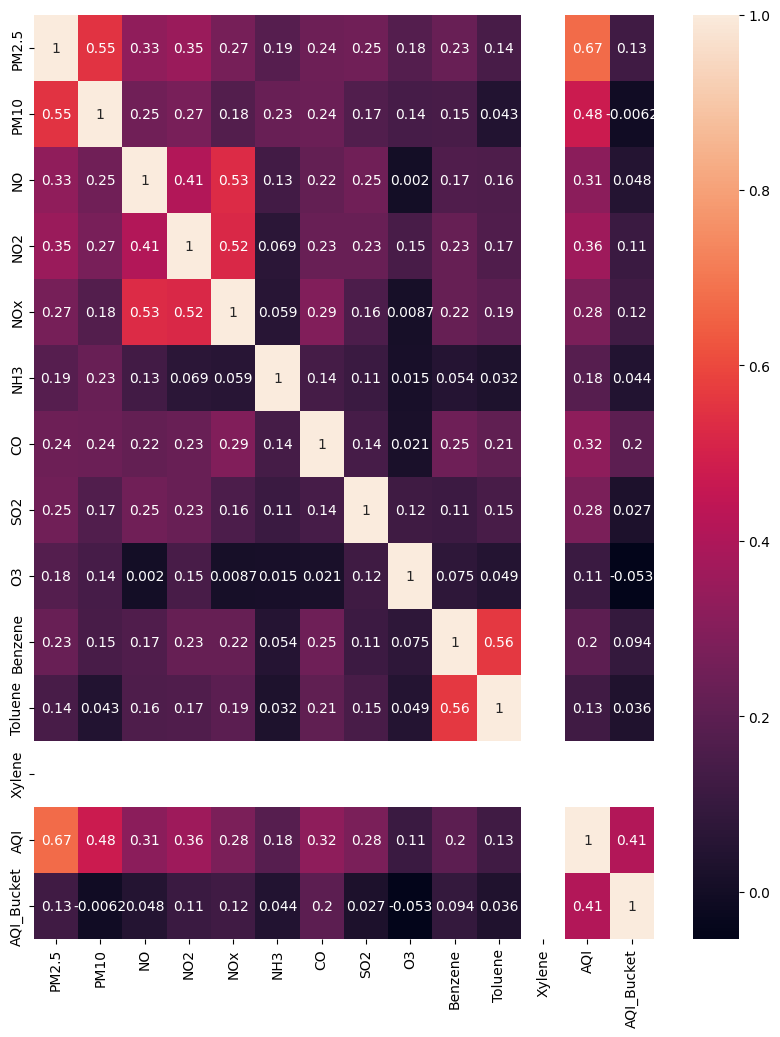

In [156]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,12))
sns.heatmap(df_1.corr(), annot = True)
plt.show()

<Axes: ylabel='AQI_Bucket'>

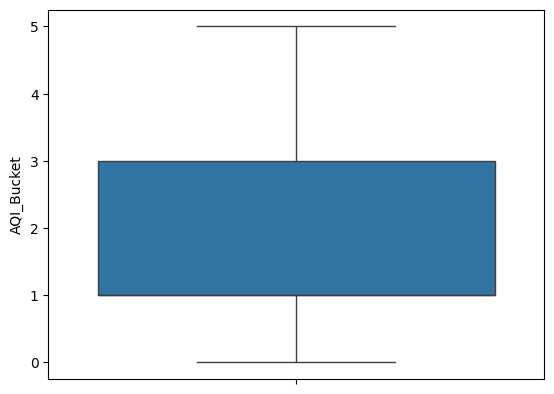

In [126]:
import seaborn as sns
sns.boxplot(df['AQI_Bucket'])

In [238]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df[['PM2.5', 'PM10', 'AQI_Bucket']]
y = df['AQI']
lr = LinearRegression()

In [228]:
X.columns

Index(['PM2.5', 'AQI_Bucket'], dtype='object')

In [240]:
col1 = [['PM2.5', 'PM10', 'AQI_Bucket']]

In [241]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

for i in col1:
  X_train[i] =sc.fit_transform(X_train[i])

  X_test[i] = sc.transform(X_test[i])

In [242]:
lr.fit(X_train, y_train)
prediction = lr.predict(X_test)

In [243]:
from sklearn.metrics import r2_score, mean_squared_error
print(mean_squared_error(y_test, prediction))
print(r2_score(y_test, prediction))

0.3228920324198764
0.5907048334262572
